In [1]:
import torch

In [2]:
tensor1 = torch.Tensor([[1,2,3],[4,5,6]])
tensor1

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [3]:
tensor2 = torch.tensor([[7,8,9],[10,11,12]])
tensor2

tensor([[ 7,  8,  9],
        [10, 11, 12]])

In [4]:
# when true, will track computations for a tensor in the forward phase
#        and will calculate gradients for this tensor in the backward phase
tensor1.requires_grad

False

In [5]:
# enable tracking history on this tensor if set to true
tensor1.requires_grad_()
tensor1.requires_grad

True

In [6]:
print(tensor1.grad)

None


In [7]:
# Tensors and functions make up our directed acyclic computation graph
print(tensor1.grad_fn)

None


In [20]:
output_tensor = tensor1 * tensor2

In [10]:
output_tensor.requires_grad

True

In [11]:
print(output_tensor.grad)

None


In [12]:
print(output_tensor.grad_fn)

In [13]:
output_tensor

tensor([[ 7., 16., 27.],
        [40., 55., 72.]], grad_fn=<MulBackward0>)

In [25]:
output_tensor = (tensor1*tensor2).mean()
print(output_tensor.grad_fn)

In [34]:
output_tensor

tensor(36.1667, grad_fn=<MeanBackward0>)

In [35]:
print(tensor1.grad)

tensor([[2.3333, 2.6667, 3.0000],
        [3.3333, 3.6667, 4.0000]])


In [36]:
output_tensor.backward()

RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.

In [37]:
print(tensor1.grad)

tensor([[2.3333, 2.6667, 3.0000],
        [3.3333, 3.6667, 4.0000]])


In [38]:
print(tensor2.grad)

None


In [39]:
# stop autograd from tracking history on tensors with requires_grad=True
with torch.no_grad():
    new_tensor = tensor1 * 3
    print('new tensor = ', new_tensor)
    print('requires_grad for tensor1 = ', tensor1.requires_grad)
    print('requires_grad for tensor2 = ', tensor2.requires_grad)
    print('requires_grad for new_tensor = ', new_tensor.requires_grad)

new tensor =  tensor([[ 3.,  6.,  9.],
        [12., 15., 18.]])
requires_grad for tensor1 =  True
requires_grad for tensor2 =  False
requires_grad for new_tensor =  False


In [40]:
def calculate(t):
    return t * 2

In [41]:
@torch.no_grad()
def calculate_no_grad(t):
    return t * 2

In [42]:
result_tensor = calculate(tensor1)
result_tensor

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.]], grad_fn=<MulBackward0>)

In [43]:
result_tensor.requires_grad

True

In [46]:
result_tensor_no_grad = calculate_no_grad(tensor1)
result_tensor_no_grad

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.]])

In [47]:
result_tensor_no_grad.requires_grad

False

In [48]:
with torch.no_grad():
    new_tensor_no_grad = tensor1 * 3
    print('new_tensor_no_grad = ', new_tensor_no_grad)
    with torch.enable_grad():
        new_tensor_grad = tensor1 * 3
        print('new_tensor_grad = ', new_tensor_grad)

new_tensor_no_grad =  tensor([[ 3.,  6.,  9.],
        [12., 15., 18.]])
new_tensor_grad =  tensor([[ 3.,  6.,  9.],
        [12., 15., 18.]], grad_fn=<MulBackward0>)


In [51]:
detached_tensor = tensor1.detach()
detached_tensor # always has requires_grad set to false when detached to a new tensor

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [52]:
import torch
from torch.autograd import Variable
# deprecated

In [53]:
v1 = Variable(torch.FloatTensor([3]), requires_grad = True)
v2 = Variable(torch.FloatTensor([7]), requires_grad = False)
print(v1)
print(v2)

tensor([3.], requires_grad=True)
tensor([7.])


## linear model with Autograd

In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
x_train = np.array([[4.7],[2.4],[7.5],[7.1],[4.3],
                    [7.816],[8.9],[5.2],[8.59],[2.1],
                    [8],[10],[4.5],[6],[4]], dtype = np.float32)
y_train = np.array([[2.6],[1.6],[3.09],[2.4],[2.4],
                   [3.357],[2.6],[1.96],[3.53],[1.76],
                   [3.2],[3.5],[1.6],[2.5],[2.2]], dtype = np.float32)

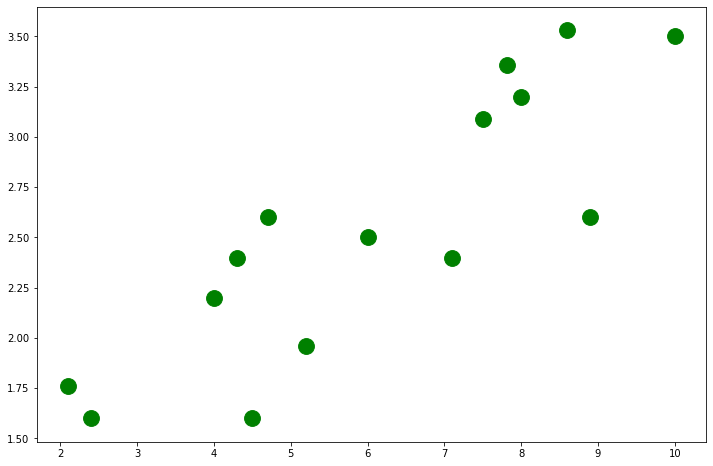

In [57]:
plt.figure(figsize=(12,8))
plt.scatter(x_train, y_train, label='Original data', s=250, c='g')

In [58]:
import torch

In [59]:
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

print('requires_grad for X_train: ', X_train.requires_grad)
print('requires_grad for Y_train: ', Y_train.requires_grad)

requires_grad for X_train:  False
requires_grad for Y_train:  False


In [60]:
input_size=1 # one x feature
hidden_size=1 # size of the hidden layer => one neuron
output_size=1 # one y value we wanna predict

In [63]:
w1 = torch.rand(input_size,hidden_size, requires_grad=True)
w1.shape

torch.Size([1, 1])

In [64]:
w1

tensor([[0.9540]], requires_grad=True)

In [65]:
w2 = torch.rand(hidden_size,output_size, requires_grad=True)
w2.shape

torch.Size([1, 1])

In [66]:
w2

tensor([[0.2469]], requires_grad=True)

In [67]:
# design hyper parameter
learning_rate = 1e-6

In [97]:
for iter in range(0, 30000):
    y_pred = X_train.mm(w1).mm(w2) # performs a forward pass through the neural network
                                    # constructed using a single linear neuron with no activation function
    loss = (y_pred - Y_train).pow(2).sum() # mean square error loss for linear regression
    if iter % 500 == 0:
        print(iter, loss.item())
    loss.backward()
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

0 4.0894880294799805
500 4.089386940002441
1000 4.089364051818848
1500 4.089359283447266
2000 4.089357852935791
2500 4.089357376098633
3000 4.089356899261475
3500 4.089356899261475
4000 4.089356899261475
4500 4.089356899261475
5000 4.089356899261475
5500 4.089356899261475
6000 4.089356899261475
6500 4.089356899261475
7000 4.089356899261475
7500 4.089356899261475
8000 4.089356899261475
8500 4.089356899261475
9000 4.089356899261475
9500 4.089356899261475
10000 4.089356899261475
10500 4.089356899261475
11000 4.089356899261475
11500 4.089356899261475
12000 4.089356899261475
12500 4.089356899261475
13000 4.089356899261475
13500 4.089356899261475
14000 4.089356899261475
14500 4.089356899261475
15000 4.089356899261475
15500 4.089356899261475
16000 4.089356899261475
16500 4.089356899261475
17000 4.089356899261475
17500 4.089356899261475
18000 4.089356899261475
18500 4.089356899261475
19000 4.089356899261475
19500 4.089356899261475
20000 4.089356899261475
20500 4.089356899261475
21000 4.0893568

In [98]:
print('w1: ', w1)
print('w2: ', w2)

w1:  tensor([[1.0028]], requires_grad=True)
w2:  tensor([[0.3955]], requires_grad=True)


In [99]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[ 4.7000],
        [ 2.4000],
        [ 7.5000],
        [ 7.1000],
        [ 4.3000],
        [ 7.8160],
        [ 8.9000],
        [ 5.2000],
        [ 8.5900],
        [ 2.1000],
        [ 8.0000],
        [10.0000],
        [ 4.5000],
        [ 6.0000],
        [ 4.0000]])

In [100]:
predicted_in_tensor = x_train_tensor.mm(w1).mm(w2)
predicted_in_tensor

tensor([[1.8642],
        [0.9519],
        [2.9747],
        [2.8161],
        [1.7055],
        [3.1001],
        [3.5300],
        [2.0625],
        [3.4071],
        [0.8329],
        [3.1730],
        [3.9663],
        [1.7848],
        [2.3798],
        [1.5865]], grad_fn=<MmBackward>)

In [101]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[1.8641658],
       [0.9519144],
       [2.9747324],
       [2.81608  ],
       [1.7055135],
       [3.1000679],
       [3.530016 ],
       [2.0624812],
       [3.4070604],
       [0.8329251],
       [3.173048 ],
       [3.96631  ],
       [1.7848396],
       [2.3797863],
       [1.586524 ]], dtype=float32)

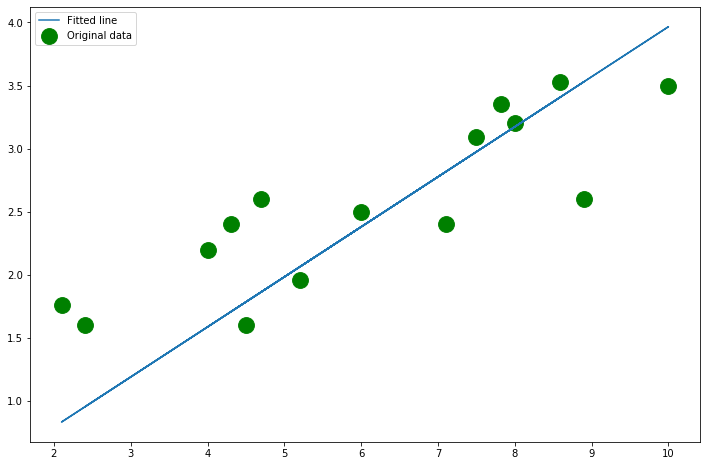

In [102]:
plt.figure(figsize=(12,8))
plt.scatter(x_train, y_train, label='Original data', s=250, c='g')
plt.plot(x_train,predicted, label = 'Fitted line')
plt.legend()
plt.show()